# Title: MOBILE PRICE PREDICTION

## Date : 12 Aug, 2024

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ABOUT DATASET

This dataset is a collection of information about various mobile phone types. It is a cleaned dataset.

The columns available in the dataset are:

- **Ratings:** This field contains the various ratings given by customers.
- **Ram:** This field contains the RAM capacity of the phone in GB.
- **ROM:** This field contains the amount of storage space available on the phone in GB.
- **Mobile_Size:** This field indicates the size of the screen in inches.
- **Primary_Cam:** This field indicates the number of pixels of the back camera.
- **Selfi_Cam:** This field indicates the number of pixels of the front camera.
- **Battery_Power:** This field indicates the battery power.
- **Price:** This field indicates the price of the mobile phone.

All the fields are already in numerical values, either int or float.


In [2]:
df = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv') # Reading the dataset

df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [3]:
df.columns # Column Names

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

In [4]:
df.dtypes # datatype

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [5]:
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [6]:
df['Mobile_Size'] = df['Mobile_Size'].apply(lambda x: 6.5 if x>7 else x) # Screen size >7 will be replced by 6.5
df.describe()
df['Mobile_Size'].unique()

array([6.   , 4.5  , 6.4  , 6.18 , 5.8  , 6.7  , 6.53 , 4.54 , 5.5  ,
       4.7  , 6.67 , 3.7  , 6.2  , 2.   , 4.77 , 5.4  , 4.52 , 6.5  ,
       6.39 , 4.4  , 5.99 , 6.1  , 5.   , 5.7  , 6.41 , 6.3  , 4.58 ,
       4.57 , 6.28 , 4.8  , 6.08 , 6.22 , 4.503, 6.26 , 6.38 , 5.84 ,
       6.35 , 6.6  , 7.   , 6.55 , 6.59 , 6.44 , 5.6  , 6.52 , 5.9  ,
       5.65 ])

## Correlation
Positive Correlation : One variable/entity increases then other also increases.
Negative Correlation : One variable/entity increases then other decreases.

## Heatmap

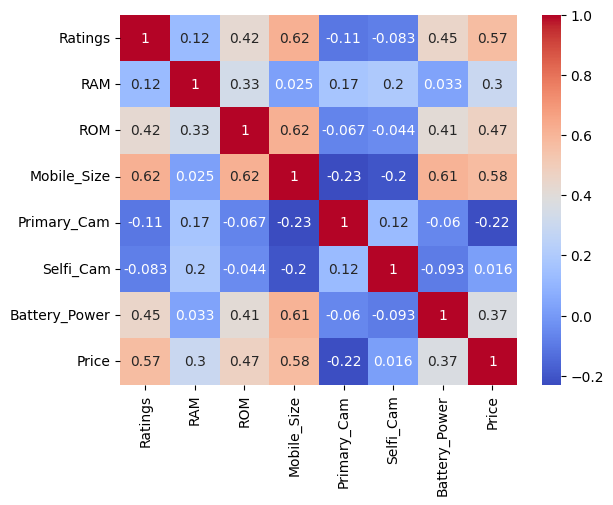

In [7]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

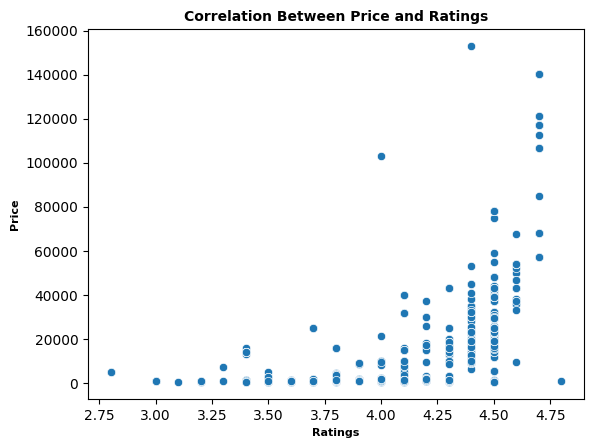

In [8]:
sns.scatterplot(x='Ratings',y='Price', data=df)
plt.xlabel('Ratings',weight='bold',size=8)
plt.ylabel('Price',weight='bold',size=8)
plt.title('Correlation Between Price and Ratings',weight='bold',size=10)
plt.show()

## Insights
- The data indicates a positive relationship between price and ratings. As prices rise, ratings generally improve.

- **Higher Price, Enhanced Ratings:** Items with higher prices tend to have better ratings, suggesting that pricier products may be perceived as higher quality or more satisfying to consumers.

- **Market Patterns:** The majority of data points are clustered in the lower price range, suggesting that most products are priced under 60,000. However, those with higher price tags tend to receive notably better ratings.


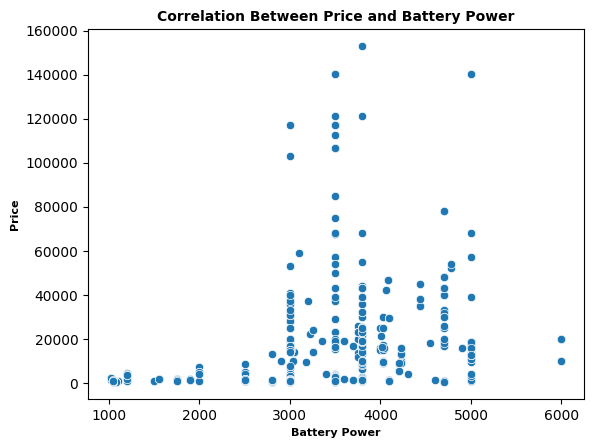

In [9]:
sns.scatterplot(x='Battery_Power',y='Price', data=df)
plt.xlabel('Battery Power',weight='bold',size=8)
plt.ylabel('Price',weight='bold',size=8)
plt.title('Correlation Between Price and Battery Power',weight='bold',size=10)
plt.show()

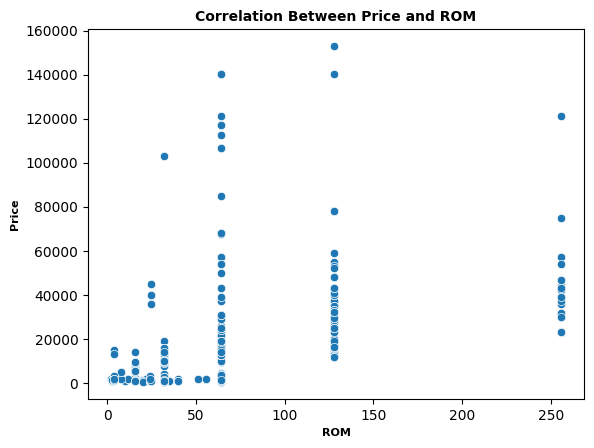

In [10]:
sns.scatterplot(x='ROM',y='Price', data=df)
plt.xlabel('ROM',weight='bold',size=8)
plt.ylabel('Price',weight='bold',size=8)
plt.title('Correlation Between Price and ROM',weight='bold',size=10)
plt.show()

## Insights

- **Positive Correlation:** The data reveals a positive correlation between ROM and price. As the ROM increases, the price of the device also tends to rise.

- **Higher ROM, Higher Price:** Devices with larger ROM capacities are generally more expensive, suggesting that increased storage might be linked to higher costs, possibly due to enhanced features or better quality.

- **Pricing Trends:** The data shows that most devices have ROM capacities in the lower range, with many priced below 30,000. However, devices with larger ROM capacities tend to be priced significantly higher.


## Train Test Split

In [11]:
x = df.drop('Price',axis=1)
y = df['Price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

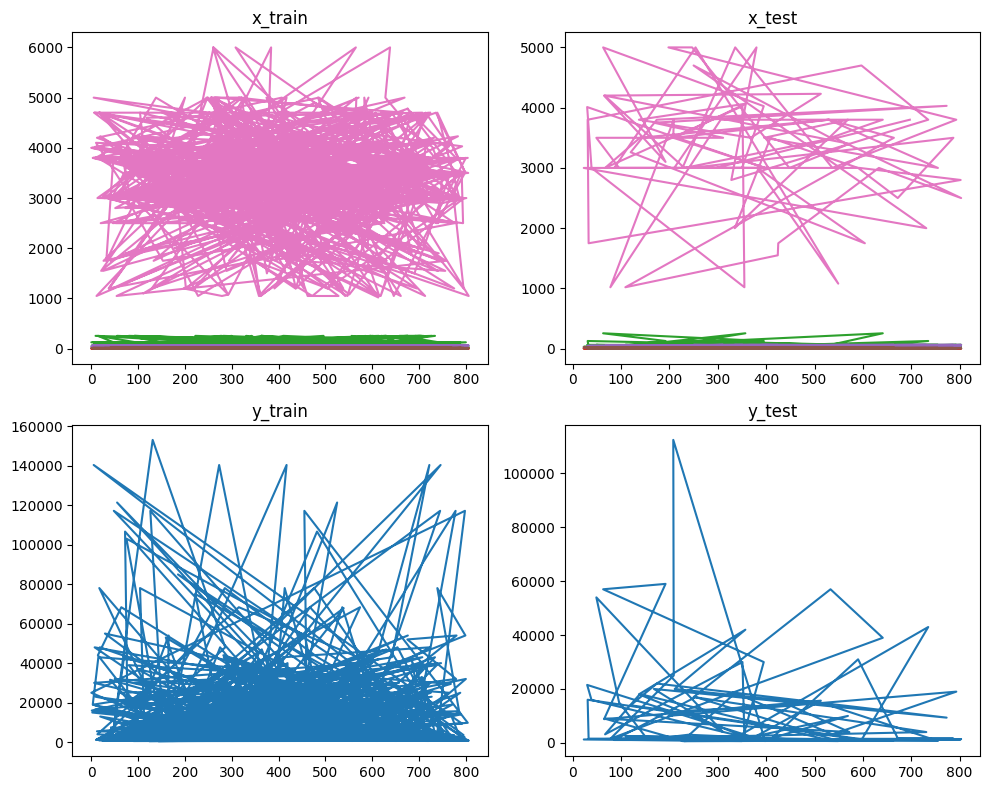

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  
axs[0, 0].plot(x_train)
axs[0, 0].set_title('x_train')

axs[0, 1].plot(x_test)
axs[0, 1].set_title('x_test')

axs[1, 0].plot(y_train)
axs[1, 0].set_title('y_train')

axs[1, 1].plot(y_test)
axs[1, 1].set_title('y_test')
plt.tight_layout()
plt.show()


# LINEAR REGRESSION 

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = lm.predict(x_test)
y_pred
new_data = pd.DataFrame({
    'Ratings': [4],
   'RAM': [6],
   'ROM': [64],
    'Mobile_Size': [6.5],
    'Primary_Cam': [16],
   'Selfi_Cam': [12],
    'Battery_Power': [4000]
})
lm.predict(new_data)


array([35194.22001009])

## MSE, RMSE & R^2 Score

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

MSE: 160721085.1679886
RMSE: 12677.581992161935
R^2 Score: 0.5270619343375811


C:\Users\ketan kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Saving or Model Serialization

In [17]:
import pickle
pickle_out = open('model.pkl','wb')
pickle.dump(lm,pickle_out)
pickle_out.close()

# RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = rf.predict(x_test)
y_pred

array([  1330.69      ,    963.39494444,    650.52380952,  18365.91      ,
         2173.07333333,  18998.91      ,  13354.57      ,  12791.93      ,
        16538.03      ,   3336.946     ,   9646.32      ,    873.41619048,
          814.87633333,   1248.82171429,   1901.27      ,    936.97733333,
         1683.84      ,   2905.87383333,    938.59333333,   1415.9       ,
        22099.20457143,   1847.3147619 ,  30118.17      ,   2253.07883333,
        16465.56      ,  61133.21      ,    747.47926906, 128565.88369408,
        17893.85      ,   2253.07883333,  18182.34      ,  38150.27      ,
        64044.18666667,  17317.46      ,   3377.546     ,   1465.205     ,
          781.21376984,  30118.17      ,  67446.23666667,  30848.7       ,
         9646.32      ,  14958.5925    ,   2696.062     ,  17390.92      ,
        39208.45333333,  19037.42      ,  14672.624     ,    870.90333333,
         1229.655     ,  13427.90833333,    805.12      ,    839.84      ,
        31418.97      ,  

In [20]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
697,1280,1330.690000
296,985,963.394944
227,639,650.523810
336,18499,18365.910000
537,3149,2173.073333
...,...,...
597,1049,2959.590000
735,42990,42029.270000
328,982,1146.315000
380,1275,7739.240000


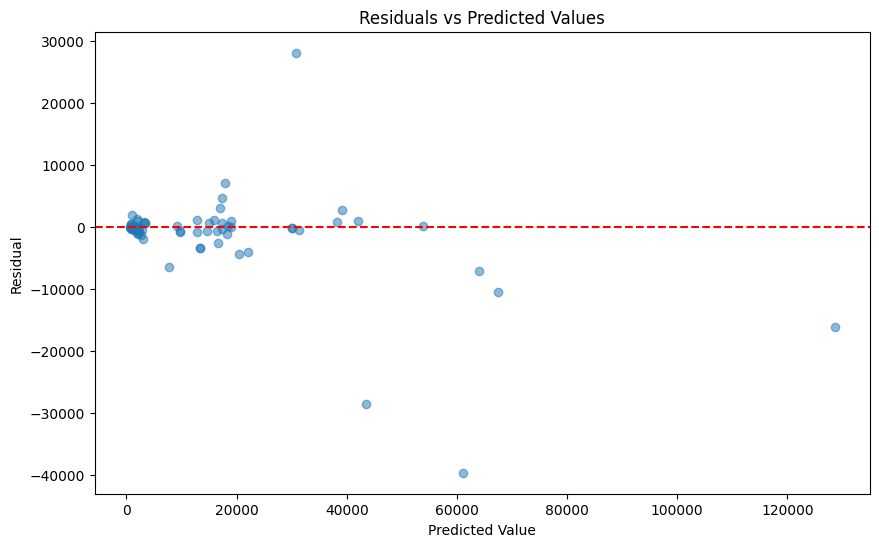

In [21]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

reg_model_diff['Residual'] = reg_model_diff['Actual value'] - reg_model_diff['Predicted value']

plt.figure(figsize=(10, 6))
plt.scatter(reg_model_diff['Predicted value'], reg_model_diff['Residual'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values')

plt.show()

## Model Evaluation

- **Model Fit:** The concentration of points around the zero line suggests that the model generally predicts well for most data points.

- **Outliers and Variability:** Points with large residuals highlight areas where the model’s predictions are less accurate. This could be due to outliers or variability in the data that the model does not capture effectively.


In [22]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.8612666392839493


# Conclusion

### The Random Forest Regressor model performed well in predicting phone prices, achieving an accuracy rate of approximately 86.12%.


## Model Saving or Model Serialization

In [23]:
import pickle
pickle_out = open('RMmodel.pkl','wb')
pickle.dump(rf,pickle_out)
pickle_out.close()